# First, rename the lab so it includes your name

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Using Functions to solve differential equations

Let's start easy:  projectile motion.  We use this because we know the answer, and we're going to make sure our functions work before doing harder problems.  For projectile motion, using initial conditions of (x,y) = (0,0) and (vx,vy) = (30,40) (implicitly using SI units), we know that ($g = 9.8$)

$$x = v_{x0} t$$
$$y = v_{y0} t - 0.5 g t^2$$

- Lets first create variables for the initial velocity
- Create a function for the x, and y values whose input is time and output is given by the equations above.

A skeleton code is there for you to start with

In [2]:
vx_0 = 30
vy_0 = 40
g = 9.8

def x_projectile(t):
    return vx_0 * t

def y_projectile(t):
    return vy_0 * t - 0.5 * g * t**2

Next, we want to make a plot.  However, this'll be a "parametric plot", where we first define time, use time to define our x and y arrays, then plot x and y.
- First, define a time array between 0 and 8 with 100 points.
- Create an array of x values, the same way we've done for plotting:  first with ``np.zeros`` then with a ``for`` loop.
- Repeat for y values.
- Make a plot with the x values on the x-axis and y values on the y-axis.  Notice how the time array isn't directly used in the plot.

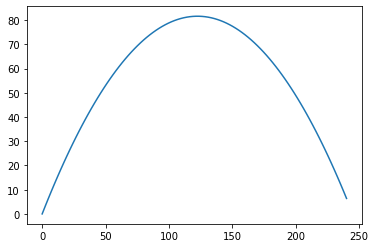

In [7]:
time = np.linspace(0,8,100)
x_values = np.zeros(len(time))
y_values = np.zeros(len(time))

vx_0 = 30
vy_0 = 40
g = 9.8

for i in range(len(x_values)):
    x_values[i] = x_projectile(time[i])
    
for i in range(len(y_values)):
    y_values[i] = y_projectile(time[i])
    
plt.figure()
plt.plot(x_values, y_values)
plt.show()

Instead of having two different function, we can create one function that has two outputs:

In [9]:
def projectile(t):
    x_values = vx_0 * t
    y_values = vy_0 * t - 0.5 * 9.8 * t**2
    return x_values, y_values

Now, instead of using two separate ``for`` loops, we use one statement that looks like:

``for i in range(len(t)):
      x_values[i], y_values[i] = projectile(t[i])``
      
You'll need to change the sample code above to use the appropriate time, x, and y arrays that you've already named.

Below, re-do your code above using the ``projectile( )`` function to make the plot.  In doing so, make sure you name your x and y as something more imaginative (and descriptive) than just ``x`` and ``y``.

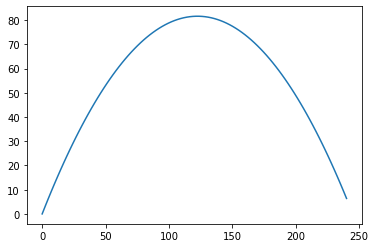

In [10]:
time = np.linspace(0,8,100)
x_values = np.zeros(len(time))
y_values = np.zeros(len(time))

for i in range(len(time)):
    x_values[i], y_values[i] = projectile(time[i])

plt.figure()
plt.plot(x_values, y_values)
plt.show()

But we don't always know the solution.  We know that projectile motion comes from Newton's Laws, which is just the solution to differential equations:

$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x$

$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y$

where in this case, $a_x = 0$ and $a_y = -9.8$.

We can numerically solve this problem by introducing a time step $\Delta t$, and thus:

$\displaystyle x_f = x + v_x \Delta t \qquad \qquad v_{xf} = v_x + a_x \Delta t$

$\displaystyle y_f = y + v_y \Delta t \qquad \qquad v_{yf} = v_y + a_y \Delta t$

Let's create a function.  Call it ``time_step``.  The inputs to function ``time_step`` will be the values of x, y, vx, vy, and $\Delta t$ (incidentally, all the information on the right-hand-sides of the equations above).  The output of the function time_step should be $x_f$, $y_f$, $v_{xf}$, $v_{yf}$.  In other words, the function should accept the previous time information (x, y, vx, vy) AND $\Delta t$ as inputs, and return the next time information.  

In [11]:
def time_step(x,y,vx,vy,dt):
    ax = 0
    ay = - 9.8
    xf = x + vx * dt
    yf = y + vy * dt
    vxf = vx + ax * dt
    vyf = vy + ay * dt
    
    return xf, yf, vxf, vyf

How can we use this?  Let's first take a little diversion.  What does the function below do?

adds one to the inputted value

In [13]:
def add_one(x):
    return x+1

Now, we are going to create a variable ``a``, set it equal to zero, then change the value of ``a`` using our function:

In [14]:
a = 0
a = add_one(a)

What's the value of ``a`` now?  ``print(a)`` below to confirm.

In [15]:
print(a)

1


We can actually do this twice:

In [16]:
a = 0
a = add_one(a)
a = add_one(a)
print(a)

2


If we parse this code:
- First, ``a`` is set to the value 0
- Next, we use ``add_one()`` to take ``a``, add one (which produces 1), and set that value as ``a``; hence ``a`` is now 1.
- We repeat it so now ``a`` is 2.

Before running the next cell of code, predict the result.  Make sure you think you can reason through your prediction before confirming your result.  Ask for help if you don't understand the result.

5


In [17]:
a = 0
for i in range(5):
    a = add_one(a)
print(a)

5


Now, back to our projectile motion problem.  If we make a graph, we can compare the solution using ``time_step`` with the projectile motion model.
- First, we need to create an array of time values, and use it to determine ``dt``

In [32]:
time = np.linspace(0,8,1000)
dt = time[1] - time[0]

- Create x and y arrays that will be plotted.  In the code below, it's called ``x_step`` and ``y_step``.


In [33]:
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

- Create variables ``x, y, vx, vy`` using the initial conditions.
- Set the value of ``x_step[0]`` and ``y_step[0]`` as the initial conditions

In [34]:
x = 0
y = 0
vx = vx_0
vy = vy_0

x_step[0] = x
y_step[0] = y

- The line ``x, y, vx, vy = time_step(x, y, vx, vy, dt)`` works by using the **current** value of x, y, vx, vy and the function ``time_step`` to find the **next** values of x, y, vx, vy.
- Then, we save these **next** values as `x_step[1]` and `y_step[1]`.

In [35]:
x, y, vx, vy = time_step(x, y, vx, vy, dt)
x_step[1] = x
y_step[1] = y

- This repeats again for ``x_step[2]`` and ``y_step[2]``, and in principle, should go on for all the terms in ``x_step`` and ``y_step``.

In [36]:
x, y, vx, vy = time_step(x, y, vx, vy, dt)
x_step[2] = x
y_step[2] = y

The code above just takes care of the first two steps, but it really looks ready to put in a ``for`` loop to do all the terms.  In the cell below, re-write all the above code, but utilizing a `for` loop to set all the values of `x_step`.  You should have all the relevant code in the cell below.

Please note that ``for i in range(len(time)):`` starts with ``i = 0``.  If you want to start somewhere else, e.g., ``i = 1``, then you should use ``for i in range(1,len(time)):``

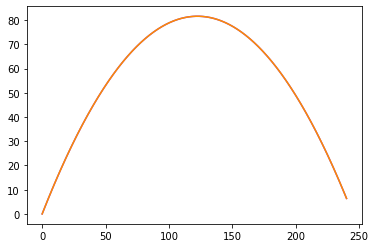

In [52]:
time = np.linspace(0,8,1000000)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = vx_0
vy = vy_0

for i in range(len(time)):
    x, y, vx, vy = time_step(x, y, vx, vy, dt)
    x_step[i] = x
    y_step [i] = y
plt.figure()
plt.plot(x_step, y_step, color= "blueviolet")
plt.plot(x_values, y_values, color= "darkorange")
plt.show()

Now, you want to see how well this worked.  One way to do this is to make a graph.  
- As you did at the beginning, plot the model projectile motion curve. 
- Also, plot ``y_step`` vs. ``x_step``.
- Sometimes it's hard to figure out which one is which.  One way to tell the difference is to have a different line style, for example, ``plt.plot(x_step, y_step, linestyle='--')`` will create a dashed line.  (You can search for other line styles as well, also you can figure out how to make plots different colors, etc.)

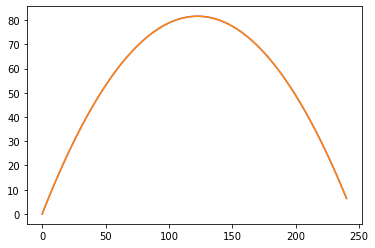

In [48]:
plt.figure()
plt.plot(x_step, y_step, color= "blueviolet")
plt.plot(x_values, y_values, color= "darkorange")
plt.show()

Your results will have the same shape, but won't perfectly match.  Why not?  Basically, you replaced $\displaystyle \frac{dx}{dt}$ with $\displaystyle \frac{\Delta x}{\Delta t}$.  In calculus, this equivalence only work when $\Delta t \rightarrow 0$.  However, with a computer, we can't actually let ``dt = 0`` (because then we'd take an infinite number of time steps!).  The solution:  take as small a value of dt as possible for accuracy, while taking as large a value of dt as possible for speed.  It is a trade-off.  

In your code above, we want to make ``dt`` smaller.  How can we do that?  Well, the line ``dt = time[1] - time[0]`` uses the results of ``np.linspace( )`` to figure out ``dt``.  This means we should change the ``np.linspace( )`` command to make the spacing between time points closer.  Change this by an order of magnitude and run the code, you should see that the result is closer to the model.  Continue to make ``dt`` smaller by an order of magnitude until there is a noticable slowdown of your computing time (i.e., it takes at least a second to run; you don't want to go further because 1 second quickly becomes 10, then 100 and so on).  Put all the code needed to do the calculation and graph the output into one cell for ease.

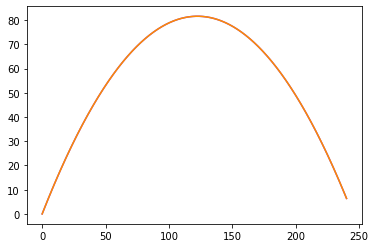

In [53]:
time = np.linspace(0,8,1000000)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = vx_0
vy = vy_0

for i in range(len(time)):
    x, y, vx, vy = time_step(x, y, vx, vy, dt)
    x_step[i] = x
    y_step [i] = y
plt.figure()
plt.plot(x_step, y_step, color= "blueviolet")
plt.plot(x_values, y_values, color= "darkorange")
plt.show()

But, what if we didn't actually know what it should look like?  We, can do some physics and know that the total energy is conserved (setting m = 1 and knowing that $g = 9.8$):

$\displaystyle E = \frac{1}{2} (v_x^2 + v_y^2) + g y $

Let's check the energy at each time for our time_step routine.  Since we want to calculate energy a lot, it make sense to create a function.  Create an energy function that accepts as inputs x, y, vx, vy and returns the energy as defined above.

In [56]:
def energy_func(x, y, vx, vy):
    g = 9.8
    return .5*(vx**2+vy**2)+g*y

Now we're prepared to take the energy at every time point, and make a graph.  To do this, we need to alter our previous code so that you save not only `x_step` and `y_step`, but the energy as well within your ``for`` loop.
- Create a plot of energy vs. time
- Notice how this plot changes as ``dt`` gets smaller

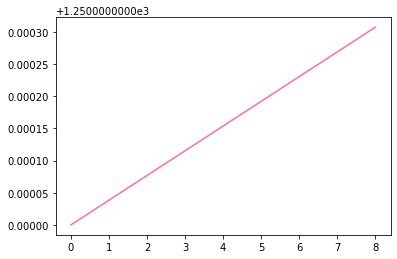

In [71]:
time = np.linspace(0,8,10000000)
dt = time[1] - time[0]

energy = np.zeros(len(time))

x = 0
y = 0
vx = vx_0
vy = vy_0

for i in range(len(time)):
    x, y, vx, vy = time_step(x, y, vx, vy, dt)
    energy[i] = energy_func(x, y, vx, vy)
    
plt.figure()
plt.plot(time, energy, color = "hotpink")
plt.show()

**If you have time, completing this is your homework:** Let's include air resistance:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - b v_x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = -g - b v_y$$
using $g = 9.8$ and $b = 0.1$.  You should write code that:
- rewrites the ``time_step`` function to incorporate a different ``ax`` and ``ay``.
- Use the same initial conditions, and plot the result
- Include the projectile model as a second curve on the plot to see the difference.  Make sure at least one of the curves has a different ``linestyle``.
- Plot energy vs. time to see that the results at least physically make sense.